In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv("mortality_by_latitude.csv")
print("Shape: ", df.shape)
print(df.info())
df.head()

Shape:  (16, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   latitude         16 non-null     int64  
 1   mortality_index  16 non-null     int64  
 2   temperature      16 non-null     float64
dtypes: float64(1), int64(2)
memory usage: 516.0 bytes
None


,latitude,mortality_index,temperature
0,50,1025,51.3
1,51,1045,49.9
2,52,1004,50.0
3,53,959,49.2
4,54,870,48.5


make a plot of mortality index against mean average temperature. Is it hollow up or hollow down? Try to identify a transformation of one of the variables that will straighten out the relationship, and make a plot of the residuals to check for any remaining patterns.

Text(0.5, 0, 'Average Temperature')

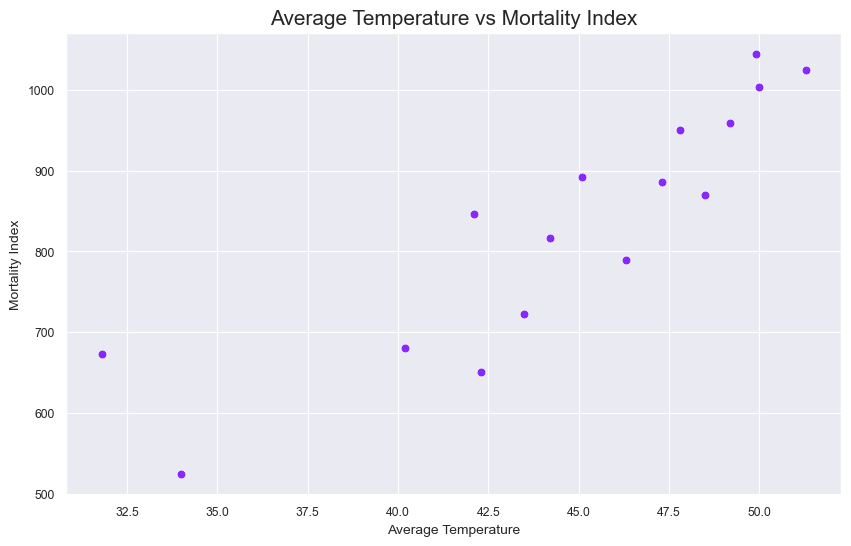

In [68]:
sns.set_context("paper")
sns.set_style("darkgrid")
fig,ax = plt.subplots(1,1, figsize=(10,6))
sns.scatterplot(df, x="temperature", y="mortality_index", ax=ax, s=40, color="#8629ff")
plt.title("Average Temperature vs Mortality Index", fontsize=15)
plt.ylabel("Mortality Index", fontsize=10)
plt.xlabel("Average Temperature", fontsize=10)

It appear as though the data points shows a clear upward trend, resembling a "hollow up" shape (concave up). The data `moratlity_index` seemed to accelerate as the temperature increases. For that reason, we can appply log transformation to 'straighten up' the data points.


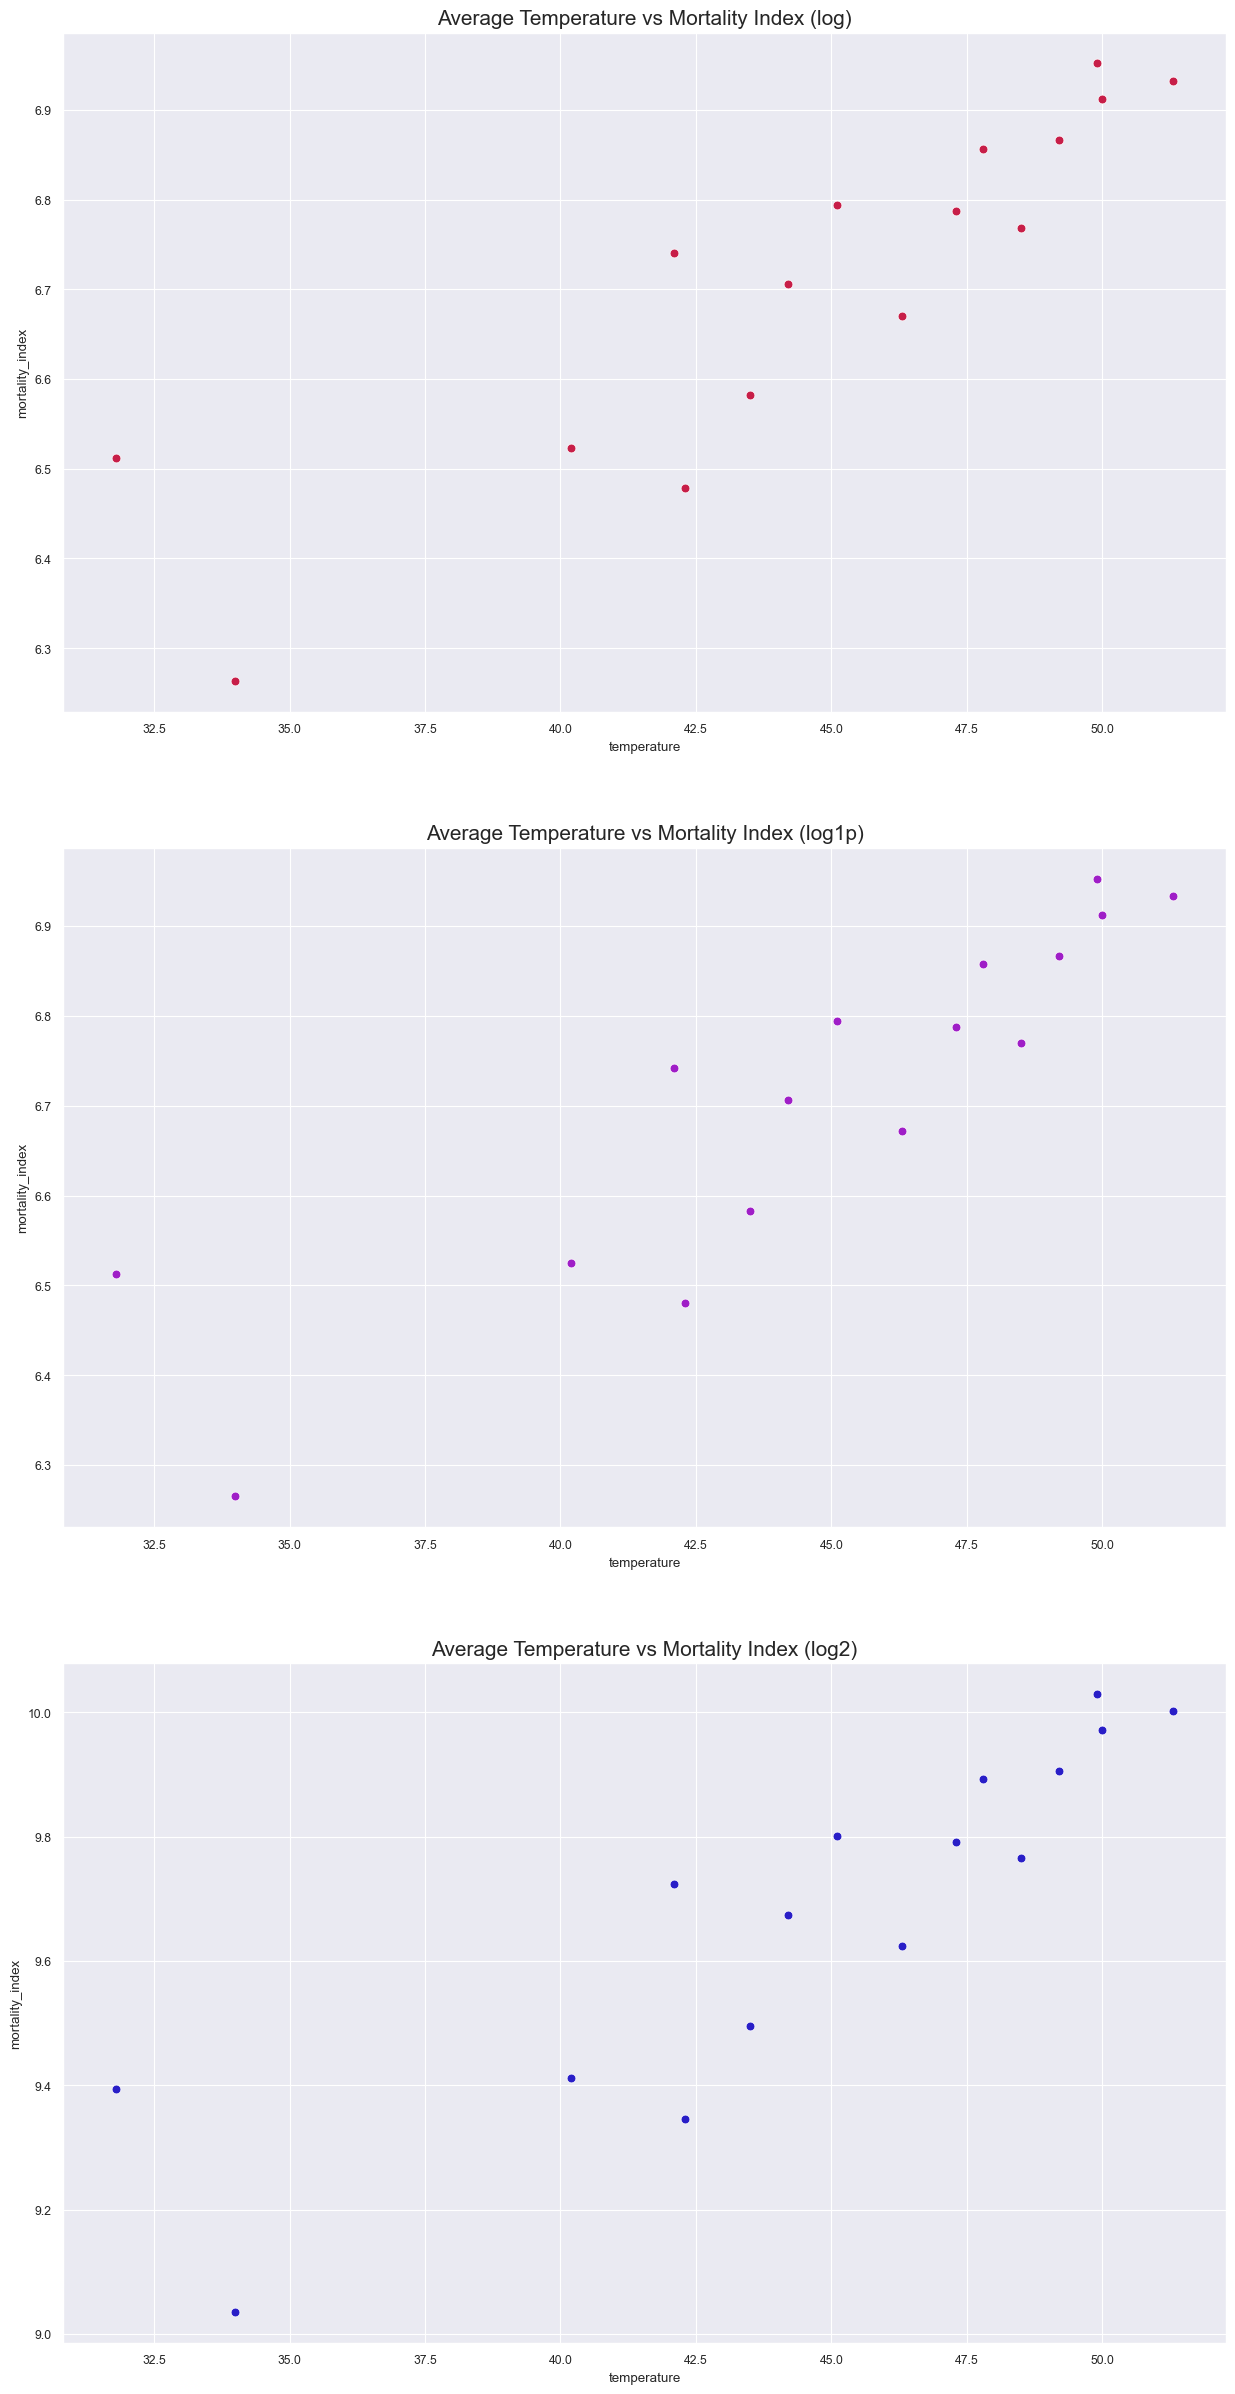

In [90]:
log_transform = [np.log, np.log1p, np.log2]
log_name = ["log", "log1p", "log2"]
pallete = ["#c71e48", "#9f1ec7", "#291ec7"]
fig, ax = plt.subplots(ncols=1, nrows=3, figsize=(15,30))
ax = ax.flatten()

for i in range(len(log_transform)):
    log_transformed = log_transform[i](df['mortality_index'])
    sns.scatterplot(x=df['temperature'], y=log_transformed, ax=ax[i], s=40, color=pallete[i])
    ax[i].set_title(f"Average Temperature vs Mortality Index ({log_name[i]})", fontsize=15)